### Abdalla Farid & Graells Noah

In [11]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils.multiclass import unique_labels

%matplotlib inline

In [12]:
# This is a method to read the MNIST dataset from a ROOT directory
def load_MNIST(ROOT):
  '''load all of mnist
  training set first'''

  Xtr = []
  train = pd.read_csv(os.path.join(ROOT, 'mnist_train.csv'))
  X = np.array(train.drop('label', axis=1))
  Ytr = np.array(train['label'])
  # With this for-loop we give the data a shape of the acctual image (28x28)
  # instead of the shape in file (1x784)
  for row in X:
      Xtr.append(row.reshape(28,28))
  # load test set second
  Xte = []
  test = pd.read_csv(os.path.join(ROOT, 'mnist_test.csv'))
  X = np.array(test.drop('label', axis=1))
  Yte = np.array(test['label'])
  # same reshaping
  for row in X:
      Xte.append(row.reshape(28,28))
  
  return np.array(Xtr), np.array(Ytr), np.array(Xte), np.array(Yte)

In [13]:
# Load the raw MNIST data.
mnist_dir = r'/Users/noahgraells/Documents/master-hes-so/semestre-1/machine-learning/MachLe-Practical-Work/ml-pw-07/ex1-classification-svm/mnist'   # TODO: update this dir information to your own dir
X_train, y_train, X_test, y_test = load_MNIST(mnist_dir)

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)

N_test_per_class = 30
N_train_per_class = 60

X_train2 = []
y_train2 = []
X_test2 = []
y_test2 = []

for y, cls in enumerate(classes): # y and cls takes values from 0-9
    idxs = np.flatnonzero(y_train == y) # gets the indices of samples that corresponds to class y
    idxs = np.random.choice(idxs, N_train_per_class, replace=False) # picks randomly samples_per_class indices
    for i, idx in enumerate(idxs):
        X_train2.append(X_train[idx].flatten())
        y_train2.append(y_train[idx])
        
    idxs = np.flatnonzero(y_test == y) # gets the indices of samples that corresponds to class y
    idxs = np.random.choice(idxs, N_test_per_class, replace=False) # picks randomly samples_per_class indices
    for i, idx in enumerate(idxs):
        X_test2.append(X_test[idx].flatten())
        y_test2.append(y_test[idx])


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window. Also setting some parameters for display.
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

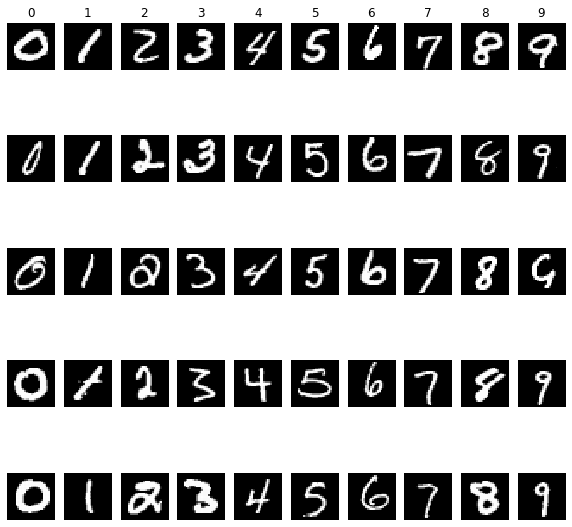

In [14]:
# Now let's visualise some of the images

samples_per_class = 5
for y, cls in enumerate(classes): # y and cls takes values from 0-9
    idxs = np.flatnonzero(y_train == y) # gets the indices of samples that corresponds to class y
    idxs = np.random.choice(idxs, samples_per_class, replace=False) # picks randomly samples_per_class indices
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1   # determines the sub-plot index
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
            
plt.show()

In [15]:
X_train = np.array(X_train2)/255
y_train = np.array(y_train2)
X_test = np.array(X_test2)/255
y_test = np.array(y_test2)

### Simple SVM

In [16]:
clf = svm.SVC()
clf.fit(X_train, y_train) 

/Users/noahgraells/Documents/master-hes-so/semestre-1/machine-learning/venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
y_predict = clf.predict(X_test)
print(confusion_matrix(y_test, y_predict))

[[28  0  0  0  0  2  0  0  0  0]
 [ 0 29  1  0  0  0  0  0  0  0]
 [ 1  2 26  0  1  0  0  0  0  0]
 [ 0  1  3 23  0  1  0  0  2  0]
 [ 0  0  0  0 25  0  1  0  0  4]
 [ 0  1  0  0  1 26  0  2  0  0]
 [ 0  0  0  0  0  1 29  0  0  0]
 [ 0  0  0  0  1  0  0 24  0  5]
 [ 0  0  0  1  0  1  0  0 27  1]
 [ 0  0  0  0  4  0  0  0  0 26]]


### Using gridsearch

In [19]:
params = {'C': [1, 10, 100, 1000], 
          'gamma': [0.001, 0.0001], 
          'kernel': ['linear', 'rbf', 'poly'],
          'degree': [2,3],
          'coef0': [0.0, 1.0]}


svc = svm.SVC()
clf = GridSearchCV(svc, params, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

print(clf, classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'coef0': [0.0, 1.0],
                         'degree': [2, 3], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)               precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       0.97      0.93      0.95        30
           2       0.84      0.87      0.85        30
           3   

### Best params

In [20]:
clf.best_params_

{'C': 10, 'coef0': 0.0, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}

### Meilleures et pire classes

La classe 0 a un très bon recall, c'est a dire que les zéros son toujours détecté comme des zéros. Cepandant en terme de précision, la calsse 1 et 6 sont les meilleures (on ne détecte pas souvant des autres nombre comme étant des 6). Globalement, (f1-score) ce sont les classes 1 et 6 qui sont aussi les meilleures.

### Impacte de la taille du dataset
En triplant la taille du training set et celle du dataset, l'entrainement a pris beaucoup plus de temps. Quant au performance du modèle, nous somme passé de 91% d'accuracy à 92%